Fernanda González Dávila
# Parcial 1
## 1. Explorar y describir el dataset MPG (Miles Per Gallon).

**INFO:** Displacement son pulgadas cúbicas. Origin: 1 América, 2 Europa, 3 Asia.

### Buscar datos faltantes, outliers, limpiar y análisis univariado

In [1]:
# Importing the libraries
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('mpg.csv')
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

Se encontraron valores '?', que fueron removidos utilizando Excel. También algunos nombres de marcas con diferentes grafías en varias observaciones fueron estandarizados.

In [3]:
dataset.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### Análisis multivariado

In [4]:
df1 = dataset.groupby(['model_year'])[['mpg']].aggregate(np.mean).reset_index()
df1.head()

,model_year,mpg
0,70,17.689655
1,71,21.250000
2,72,18.714286
3,73,17.100000
4,74,22.703704


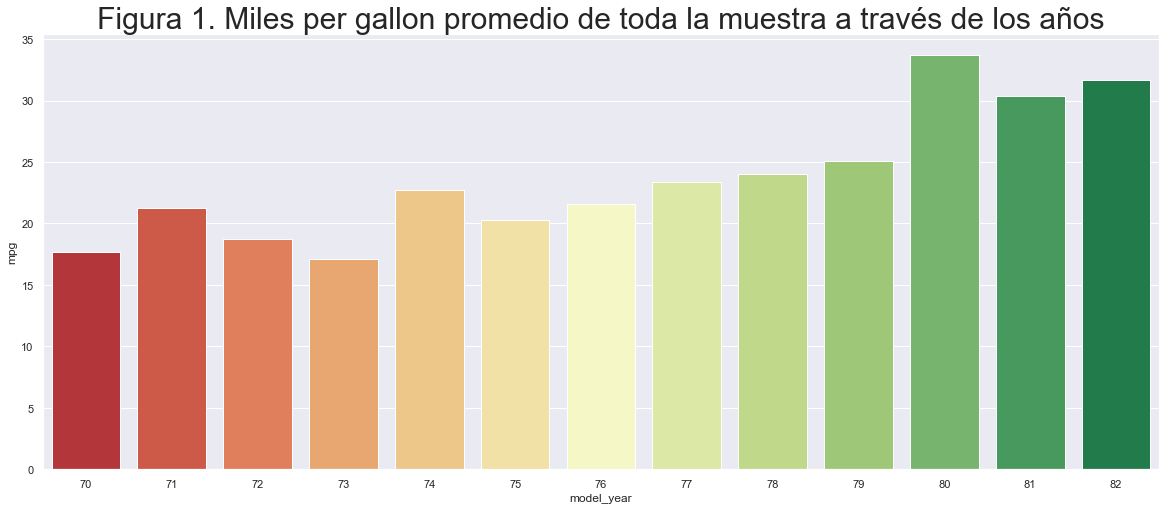

In [5]:
seaborn.set()
plt.subplots(figsize=(20,8))
plt.title('Figura 1. Miles per gallon promedio de toda la muestra a través de los años', fontsize=30)
seaborn.barplot(x='model_year', y='mpg', data=df1, order=df1['model_year'], palette='RdYlGn')

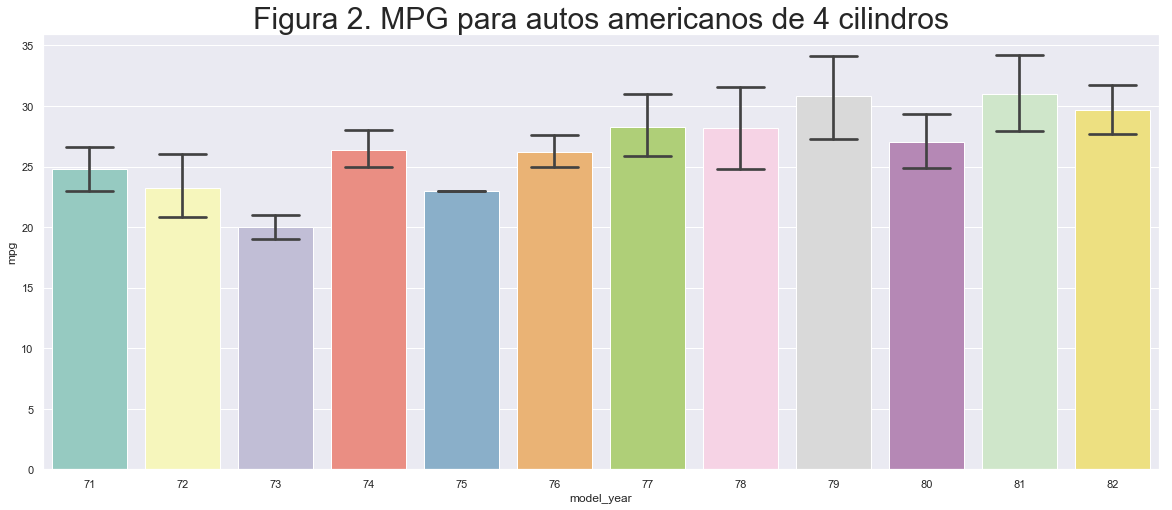

In [6]:
df2 = dataset.groupby(['origin', 'cylinders']).get_group((1, 4))
seaborn.set()
plt.subplots(figsize=(20,8))
#plt.ylim(2.75, 2.775)
plt.title('Figura 2. MPG para autos americanos de 4 cilindros', fontsize=30)
seaborn.barplot(x='model_year', y='mpg', data=df2, palette='Set3', capsize=0.5)

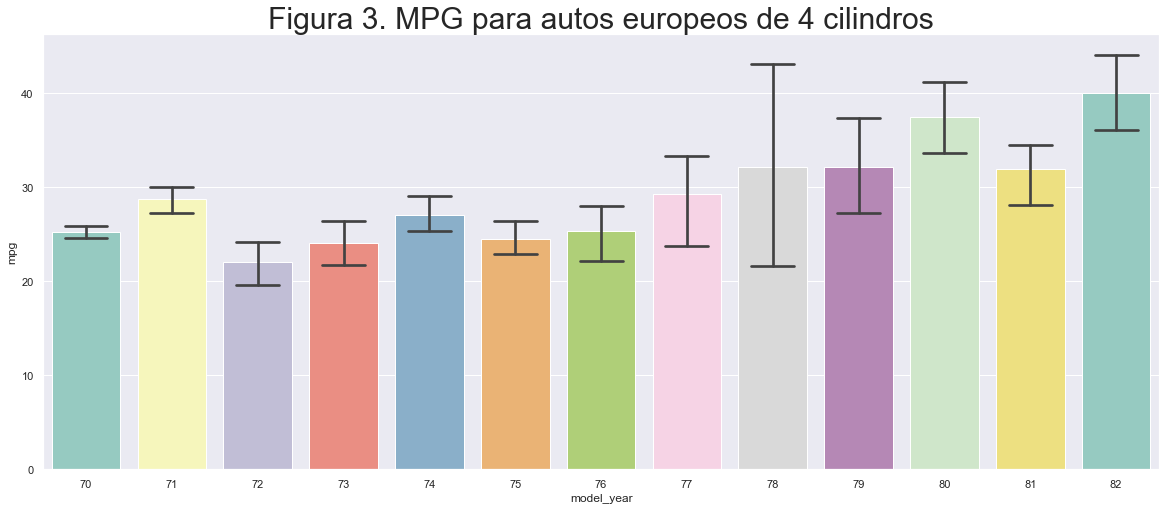

In [7]:
df2 = dataset.groupby(['origin', 'cylinders']).get_group((2, 4))
seaborn.set()
plt.subplots(figsize=(20,8))
#plt.ylim(2.75, 2.775)
plt.title('Figura 3. MPG para autos europeos de 4 cilindros', fontsize=30)
seaborn.barplot(x='model_year', y='mpg', data=df2, palette='Set3', capsize=0.5)

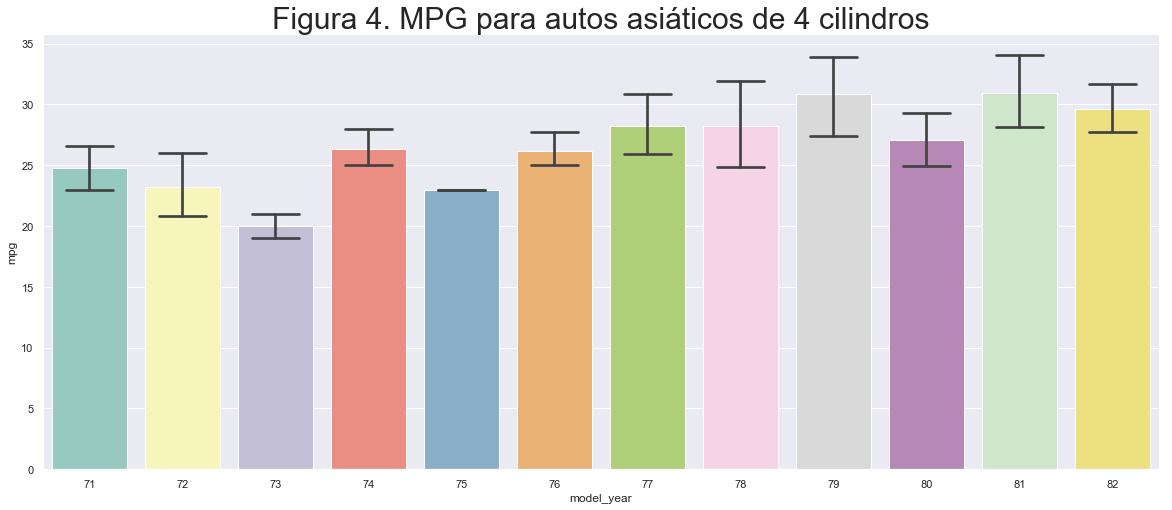

In [8]:
df2 = dataset.groupby(['origin', 'cylinders']).get_group((1, 4))
seaborn.set()
plt.subplots(figsize=(20,8))
#plt.ylim(2.75, 2.775)
plt.title('Figura 4. MPG para autos asiáticos de 4 cilindros', fontsize=30)
seaborn.barplot(x='model_year', y='mpg', data=df2, palette='Set3', capsize=0.5)

In [9]:
dataset['marca'] = dataset['name'].str.split().str[0].str.strip()
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,marca
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford


Text(0.5, 1.03, 'Figura 5. MPG rendidos por cada marca, \npromedio según cilindraje')

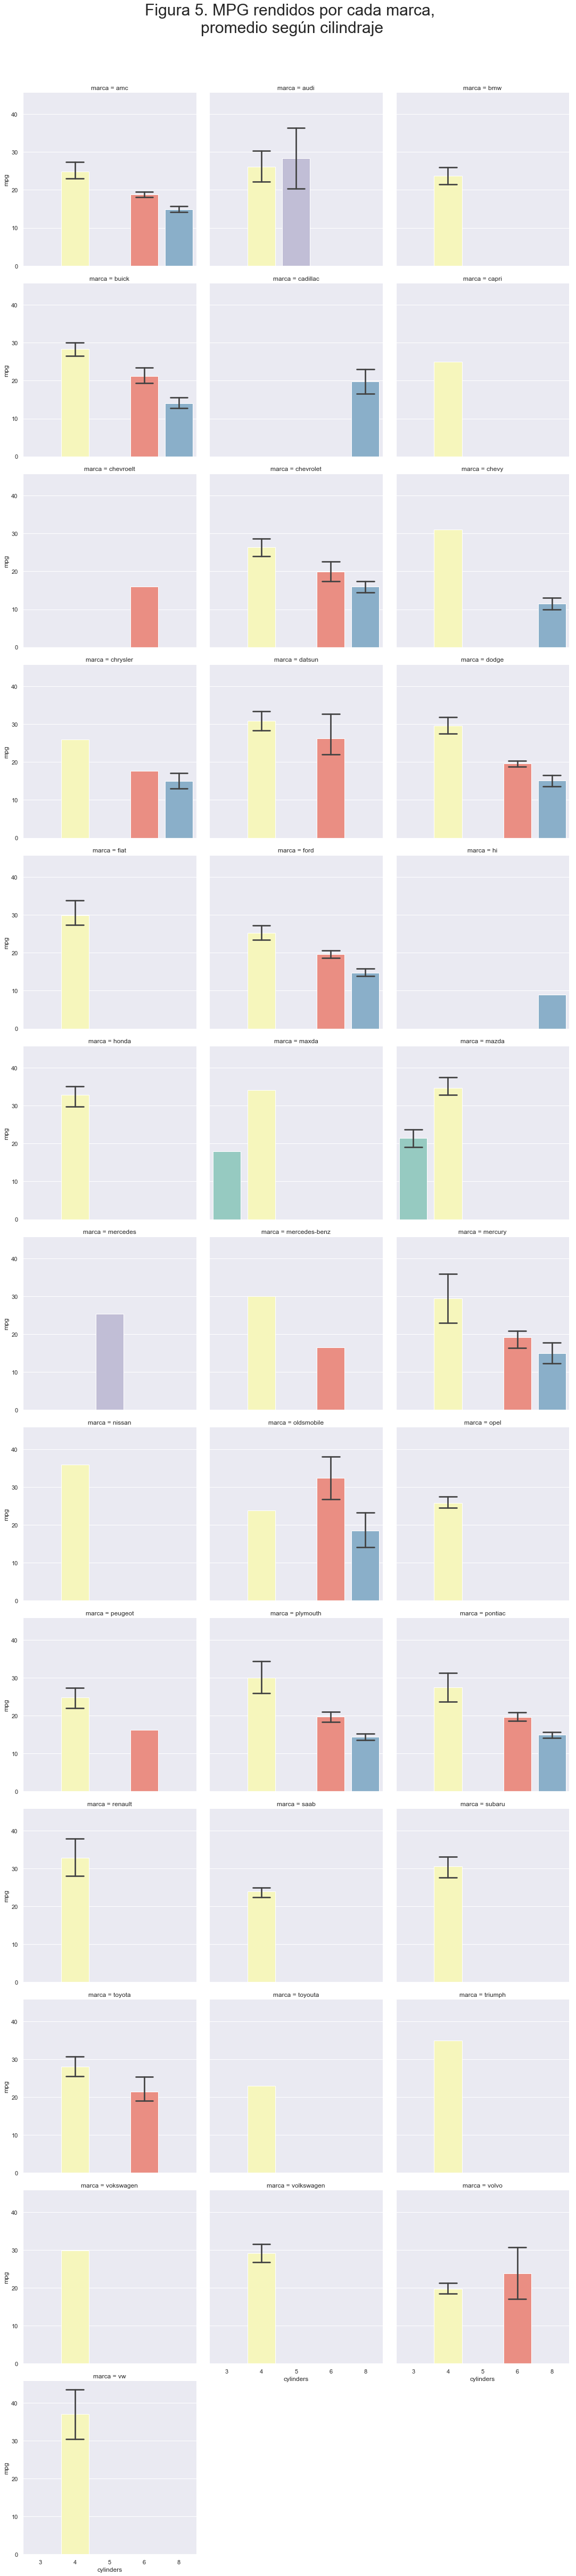

In [10]:
df3 = dataset.groupby(['marca', 'model_year', 'cylinders'])[['mpg']].aggregate(np.mean).reset_index()
seaborn.set()
seaborn.catplot(x='cylinders', y='mpg', col='marca', col_wrap=3, data=df3, palette='Set3', kind='bar', capsize=0.5).fig.suptitle('Figura 5. MPG rendidos por cada marca, \npromedio según cilindraje', y=1.03, fontsize=30)

## 2. Modelo para predecir el consumo en mpg del 20% del dataset.
Usar random_state de 1234 para la división del dataset.

1. ¿Cuál es la variable dependiente?
    - El consumo, cuya unidad de medida es mpg.
2. ¿Cuáles son las variables independientes?
    - El cilindraje, desplazamiento, horsepower, peso, aceleración, año del modelo, región de origen y marca.
3. ¿Existen variables categóricas?
    - El cilindraje (3, 4, 5, 6 u 8), el año del modelo (71 - 82), el origen y la marca son variables categóricas.
    


Para esta predicción, utilizaré una regresión lineal.

In [11]:
# Importing the dataset
X = dataset.iloc[:, 2:3].values
y = dataset.iloc[:, 0].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1234)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

## 3. Significancia de las variables

In [13]:
import statsmodels.formula.api as sm
model = sm.ols(formula='mpg ~ cylinders', data=dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     597.1
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           4.50e-81
Time:                        12:30:34   Log-Likelihood:                -1199.6
No. Observations:                 398   AIC:                             2403.
Df Residuals:                     396   BIC:                             2411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.9493      0.833     51.557      0.000      41.312      44.587
cylinders     -3.5629      0.146    -24.435      0.000      -3.850      -3.276
==============================================================================
Omnibus:                       39.142   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.841
Skew:                           0.704   Prob(JB):                     2.03e-12
Kurtosis:                       4.124   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
import statsmodels.formula.api as sm
model = sm.ols(formula='mpg ~ displacement', data=dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     725.0
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.66e-91
Time:                        12:30:34   Log-Likelihood:                -1175.5
No. Observations:                 398   AIC:                             2355.
Df Residuals:                     396   BIC:                             2363.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.1748      0.492     71.519      0.000      34.208      36.142
displacement    -0.0603      0.002    -26.926      0.000      -0.065      -0.056
==============================================================================
Omnibus:                       41.373   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.024
Skew:                           0.711   Prob(JB):                     9.24e-14
Kurtosis:                       4.264   Cond. No.                         463.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
import statsmodels.formula.api as sm
model = sm.ols(formula='mpg ~ horsepower', data=dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     12.54
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           3.34e-64
Time:                        12:30:34   Log-Likelihood:                -1068.9
No. Observations:                 398   AIC:                             2326.
Df Residuals:                     304   BIC:                             2701.
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            19.5941      0.985     19.893      0.000      17.656      21.532
horsepower[T.102]     0.4059      4.179      0.097      0.923      -7.817       8.629
horsepower[T.103]     0.7059      4.179      0.169      0.866      -7.517       8.929
horsepower[T.105]     0.9059      1.531      0.592      0.555      -2.107       3.919
horsepower[T.107]     1.4059      4.179      0.336      0.737      -6.817       9.629
horsepower[T.108]    -0.5941      4.179     -0.142      0.887      -8.817       7.629
horsepower[T.110]     0.2392      1.373      0.174      0.862      -2.463       2.942
horsepower[T.112]     0.0725      2.543      0.029      0.977      -4.932       5.077
horsepower[T.113]     6.4059      4.179      1.533      0.126      -1.817      14.629
horsepower[T.115]     5.1459      2.066      2.491      0.013       1.080       9.212
horsepower[T.116]     5.8059      4.179      1.389      0.166      -2.417      14.029
horsepower[T.120]    -1.0191      2.257     -0.452      0.652      -5.460       3.422
horsepower[T.122]     0.4059      4.179      0.097      0.923      -7.817       8.629
horsepower[T.125]     0.1392      2.543      0.055      0.956      -4.865       5.144
horsepower[T.129]    -4.2941      3.036     -1.414      0.158     -10.268       1.680
horsepower[T.130]    -4.3941      2.066     -2.127      0.034      -8.460      -0.328
horsepower[T.132]    13.1059      4.179      3.136      0.002       4.883      21.329
horsepower[T.133]    -3.3941      4.179     -0.812      0.417     -11.617       4.829
horsepower[T.135]    -1.3941      4.179     -0.334      0.739      -9.617       6.829
horsepower[T.137]    -5.5941      4.179     -1.339      0.182     -13.817       2.629
horsepower[T.138]    -3.0941      4.179     -0.740      0.460     -11.317       5.129
horsepower[T.139]    -0.4441      3.036     -0.146      0.884      -6.418       5.530
horsepower[T.140]    -3.2513      1.824     -1.783      0.076      -6.840       0.338
horsepower[T.142]    -4.0941      4.179     -0.980      0.328     -12.317       4.129
horsepower[T.145]    -4.1370      1.824     -2.268      0.024      -7.726      -0.548
horsepower[T.148]    -5.5941      4.179     -1.339      0.182     -13.817       2.629
horsepower[T.149]    -3.5941      4.179     -0.860      0.390     -11.817       4.629
horsepower[T.150]    -4.8896      1.311     -3.728      0.000      -7.470      -2.309
horsepower[T.152]    -5.0941      4.179     -1.219      0.224     -13.317       3.129
horsepower[T.153]    -5.5941      3.036     -1.843      0.066     -11.568       0.380
horsepower[T.155]    -4.6441      3.036     -1.530      0.127     -10.618       1.330
horsepower[T.158]    -6.5941      4.179     -1.578      0.116     -14.817       1.629
horsepower[T.160]    -6.5941      3.036     -2.172      0.031     -12.568

In [16]:
import statsmodels.formula.api as sm
model = sm.ols(formula='mpg ~ weight', data=dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Fri, 05 Mar 2021   Prob (F-statistic):          2.97e-103
Time:                        12:30:34   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
import statsmodels.formula.api as sm
model = sm.ols(formula='mpg ~ acceleration', data=dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.82e-18
Time:                        12:30:34   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.9698      2.043      2.432      0.015       0.953       8.987
acceleration     1.1912      0.129      9.217      0.000       0.937       1.445
==============================================================================
Omnibus:                       17.459   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.214
Skew:                           0.497   Prob(JB):                     0.000111
Kurtosis:                       2.670   Cond. No.                         91.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
import statsmodels.formula.api as sm
model = sm.ols(formula='mpg ~ origin', data=dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     184.2
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.01e-34
Time:                        12:30:34   Log-Likelihood:                -1306.6
No. Observations:                 398   AIC:                             2617.
Df Residuals:                     396   BIC:                             2625.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8783      0.714     20.835      0.000      13.474      16.282
origin         5.4908      0.405     13.572      0.000       4.695       6.286
==============================================================================
Omnibus:                       25.653   Durbin-Watson:                   0.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.150
Skew:                           0.661   Prob(JB):                     4.68e-07
Kurtosis:                       3.106   Cond. No.                         4.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* La variable de mayor significancia para el modelo de regresión lineal es el peso, con un R^2 = 0.693.
* La variable de menor significancia para el modelo de regresión lineal es el la aceleración, con un R^2 = 0.179.

## 4. Graficar training y test set.

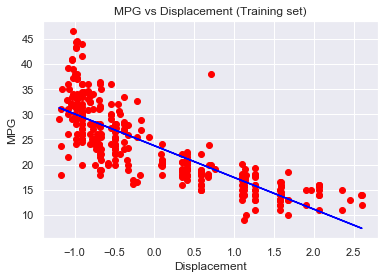

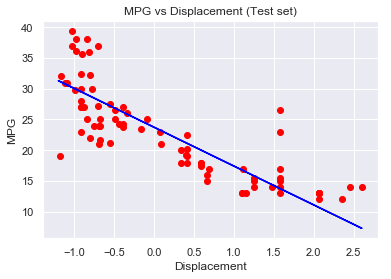

In [19]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('MPG vs Displacement (Training set)')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('MPG vs Displacement (Test set)')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.show()

## 5. Comparar training y test sets y calcular error (R^2)

In [20]:
import statsmodels.formula.api as sm
model = sm.ols(formula='mpg ~ displacement', data=dataset).fit()
predictions = model.predict(dataset)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     725.0
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.66e-91
Time:                        12:30:34   Log-Likelihood:                -1175.5
No. Observations:                 398   AIC:                             2355.
Df Residuals:                     396   BIC:                             2363.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.1748      0.492     71.519      0.000      34.208      36.142
displacement    -0.0603      0.002    -26.926      0.000      -0.065      -0.056
==============================================================================
Omnibus:                       41.373   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.024
Skew:                           0.711   Prob(JB):                     9.24e-14
Kurtosis:                       4.264   Cond. No.                         463.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# mientras más grande el abs(t_crit) más pequeño el p-value.
header = [x for x in dataset.columns if x != 'mpg']
for i in header: 
    model = sm.ols(formula=f'mpg ~ {i}', data=dataset).fit()
    predictions = model.predict(dataset)
    print(f"variable in question: {i}")
    print(model.summary())

variable in question: cylinders
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     597.1
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           4.50e-81
Time:                        12:30:35   Log-Likelihood:                -1199.6
No. Observations:                 398   AIC:                             2403.
Df Residuals:                     396   BIC:                             2411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.949

variable in question: name
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     9.124
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.94e-26
Time:                        12:30:35   Log-Likelihood:                -700.35
No. Observations:                 398   AIC:                             2011.
Df Residuals:                      93   BIC:                             3227.
Df Model:                         304                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------